In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
import factor_analyzer
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
plt.style.use('seaborn-colorblind')

* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

In [4]:
train = pd.read_csv('train.csv')

In [5]:
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [6]:
train = train.drop(['datetime'],axis=1) 

In [7]:
name = {1:'sp', 2:'su', 3:'fa', 4:'wi'}
train['season'] = train['season'].replace(name)

In [8]:
season_dummy = pd.get_dummies(train['season'])

In [9]:
train=train.join(season_dummy.add_prefix('season_'))
train=train.drop(['season'],axis=1)

In [10]:
weather = {1:'clear_or_cloud', 2:'mist_cloud', 3:'light_snow_rain', 4:'heavy_snow_rain'}
train['weather'] = train['weather'].replace(weather)

In [11]:
weather_dummy = pd.get_dummies(train['weather'])

In [12]:
train=train.join(weather_dummy.add_prefix('weather_'))
train=train.drop(['weather'],axis=1)

In [13]:
holiday = {0:'not', 1:'yes'}
train['holiday'] = train['holiday'].replace(holiday)

In [14]:
holiday_dummy = pd.get_dummies(train['holiday'])

In [15]:
train=train.join(holiday_dummy.add_prefix('holiday_'))
train=train.drop(['holiday'],axis=1)

In [16]:
workingday = {0:'not', 1:'yes'}
train['workingday'] = train['workingday'].replace(workingday)

In [17]:
workingday_dummy = pd.get_dummies(train['workingday'])

In [18]:
train=train.join(workingday_dummy.add_prefix('workingday_'))
train=train.drop(['workingday'],axis=1)

In [19]:
train.head(10)

,temp,atemp,humidity,windspeed,casual,registered,count,season_fa,season_sp,season_su,season_wi,weather_clear_or_cloud,weather_heavy_snow_rain,weather_light_snow_rain,weather_mist_cloud,holiday_not,holiday_yes,workingday_not,workingday_yes
0,9.84,14.395,81,0.0000,3,13,16,0,1,0,0,1,0,0,0,1,0,1,0
1,9.02,13.635,80,0.0000,8,32,40,0,1,0,0,1,0,0,0,1,0,1,0
2,9.02,13.635,80,0.0000,5,27,32,0,1,0,0,1,0,0,0,1,0,1,0
3,9.84,14.395,75,0.0000,3,10,13,0,1,0,0,1,0,0,0,1,0,1,0
4,9.84,14.395,75,0.0000,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0
5,9.84,12.880,75,6.0032,0,1,1,0,1,0,0,0,0,0,1,1,0,1,0
6,9.02,13.635,80,0.0000,2,0,2,0,1,0,0,1,0,0,0,1,0,1,0
7,8.20,12.880,86,0.0000,1,2,3,0,1,0,0,1,0,0,0,1,0,1,0
8,9.84,14.395,75,0.0000,1,7,8,0,1,0,0,1,0,0,0,1,0,1,0
9,13.12,17.425,76,0.0000,8,6,14,0,1,0,0,1,0,0,0,1,0,1,0


In [20]:
train_x = train[['temp','atemp','humidity','windspeed','season_fa','season_sp','season_su','season_wi','weather_clear_or_cloud','weather_heavy_snow_rain','weather_light_snow_rain','weather_mist_cloud','holiday_not','holiday_yes','workingday_not','workingday_yes']] 
train_y = train[['registered']]
#트레이닝데이터에서 y값(labeling값)과 속성 columns 분리

In [21]:
train_x.head(10)

,temp,atemp,humidity,windspeed,season_fa,season_sp,season_su,season_wi,weather_clear_or_cloud,weather_heavy_snow_rain,weather_light_snow_rain,weather_mist_cloud,holiday_not,holiday_yes,workingday_not,workingday_yes
0,9.84,14.395,81,0.0000,0,1,0,0,1,0,0,0,1,0,1,0
1,9.02,13.635,80,0.0000,0,1,0,0,1,0,0,0,1,0,1,0
2,9.02,13.635,80,0.0000,0,1,0,0,1,0,0,0,1,0,1,0
3,9.84,14.395,75,0.0000,0,1,0,0,1,0,0,0,1,0,1,0
4,9.84,14.395,75,0.0000,0,1,0,0,1,0,0,0,1,0,1,0
5,9.84,12.880,75,6.0032,0,1,0,0,0,0,0,1,1,0,1,0
6,9.02,13.635,80,0.0000,0,1,0,0,1,0,0,0,1,0,1,0
7,8.20,12.880,86,0.0000,0,1,0,0,1,0,0,0,1,0,1,0
8,9.84,14.395,75,0.0000,0,1,0,0,1,0,0,0,1,0,1,0
9,13.12,17.425,76,0.0000,0,1,0,0,1,0,0,0,1,0,1,0


In [60]:
train_x.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'season_fa', 'season_sp',
       'season_su', 'season_wi', 'weather_clear_or_cloud',
       'weather_heavy_snow_rain', 'weather_light_snow_rain',
       'weather_mist_cloud', 'holiday_not', 'holiday_yes', 'workingday_not',
       'workingday_yes'],
      dtype='object')

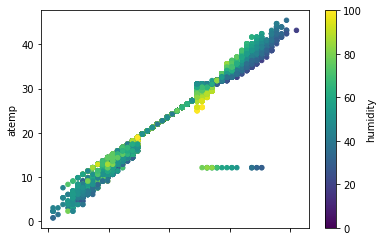

In [22]:
train_x.plot.scatter('temp', 'atemp', c='humidity', colormap='viridis')

In [23]:
train_std = StandardScaler().fit_transform(train_x) #데이터 스케일링

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [24]:
feature=['temp','atemp','humidity','windspeed','season_fa','season_sp','season_su','season_wi','weather_clear_or_cloud','weather_heavy_snow_rain','weather_light_snow_rain','weather_mist_cloud','holiday_not','holiday_yes','workingday_not','workingday_yes']
train_std=pd.DataFrame(data=train_std, columns=feature)##스케일링한 데이터 프레임
train_std.head(11)

,temp,atemp,humidity,windspeed,season_fa,season_sp,season_su,season_wi,weather_clear_or_cloud,weather_heavy_snow_rain,weather_light_snow_rain,weather_mist_cloud,holiday_not,holiday_yes,workingday_not,workingday_yes
0,-1.333661,-1.092737,0.993213,-1.567754,-0.578977,1.747245,-0.578977,-0.579118,0.716677,-0.009585,-0.292692,-0.593264,0.17149,-0.17149,1.460672,-1.460672
1,-1.438907,-1.182421,0.941249,-1.567754,-0.578977,1.747245,-0.578977,-0.579118,0.716677,-0.009585,-0.292692,-0.593264,0.17149,-0.17149,1.460672,-1.460672
2,-1.438907,-1.182421,0.941249,-1.567754,-0.578977,1.747245,-0.578977,-0.579118,0.716677,-0.009585,-0.292692,-0.593264,0.17149,-0.17149,1.460672,-1.460672
3,-1.333661,-1.092737,0.681430,-1.567754,-0.578977,1.747245,-0.578977,-0.579118,0.716677,-0.009585,-0.292692,-0.593264,0.17149,-0.17149,1.460672,-1.460672
4,-1.333661,-1.092737,0.681430,-1.567754,-0.578977,1.747245,-0.578977,-0.579118,0.716677,-0.009585,-0.292692,-0.593264,0.17149,-0.17149,1.460672,-1.460672
5,-1.333661,-1.271515,0.681430,-0.832442,-0.578977,1.747245,-0.578977,-0.579118,-1.395328,-0.009585,-0.292692,1.685590,0.17149,-0.17149,1.460672,-1.460672
6,-1.438907,-1.182421,0.941249,-1.567754,-0.578977,1.747245,-0.578977,-0.579118,0.716677,-0.009585,-0.292692,-0.593264,0.17149,-0.17149,1.460672,-1.460672
7,-1.544154,-1.271515,1.253032,-1.567754,-0.578977,1.747245,-0.578977,-0.579118,0.716677,-0.009585,-0.292692,-0.593264,0.17149,-0.17149,1.460672,-1.460672
8,-1.333661,-1.092737,0.681430,-1.567754,-0.578977,1.747245,-0.578977,-0.579118,0.716677,-0.009585,-0.292692,-0.593264,0.17149,-0.17149,1.460672,-1.460672
9,-0.912675,-0.735182,0.733394,-1.567754,-0.578977,1.747245,-0.578977,-0.579118,0.716677,-0.009585,-0.292692,-0.593264,0.17149,-0.17149,1.460672,-1.460672


In [25]:
train_std_plus_y = finalDf = pd.concat([train_std, train[['registered']]], axis = 1)
train_std_plus_y.head()

,temp,atemp,humidity,windspeed,season_fa,season_sp,season_su,season_wi,weather_clear_or_cloud,weather_heavy_snow_rain,weather_light_snow_rain,weather_mist_cloud,holiday_not,holiday_yes,workingday_not,workingday_yes,registered
0,-1.333661,-1.092737,0.993213,-1.567754,-0.578977,1.747245,-0.578977,-0.579118,0.716677,-0.009585,-0.292692,-0.593264,0.17149,-0.17149,1.460672,-1.460672,13
1,-1.438907,-1.182421,0.941249,-1.567754,-0.578977,1.747245,-0.578977,-0.579118,0.716677,-0.009585,-0.292692,-0.593264,0.17149,-0.17149,1.460672,-1.460672,32
2,-1.438907,-1.182421,0.941249,-1.567754,-0.578977,1.747245,-0.578977,-0.579118,0.716677,-0.009585,-0.292692,-0.593264,0.17149,-0.17149,1.460672,-1.460672,27
3,-1.333661,-1.092737,0.681430,-1.567754,-0.578977,1.747245,-0.578977,-0.579118,0.716677,-0.009585,-0.292692,-0.593264,0.17149,-0.17149,1.460672,-1.460672,10
4,-1.333661,-1.092737,0.681430,-1.567754,-0.578977,1.747245,-0.578977,-0.579118,0.716677,-0.009585,-0.292692,-0.593264,0.17149,-0.17149,1.460672,-1.460672,1


# 고유값과 고유벡터를 직접 구해서 pca 실행하기

* transform한 벡터를 features에 저장
* covariance matrix를 생성해서 저장
* 출력

In [26]:
features = train_std.T  
covariance_matrix = np.cov(features)
print(covariance_matrix) #covariance matrix 출력 - 16차원자료 이므로 16개가 나옴

[[ 1.00009187e+00  9.85038597e-01 -6.49547377e-02 -1.78536499e-02
   6.36033336e-01 -5.65706726e-01  1.92678970e-01 -2.66244419e-01
   5.84354814e-02 -1.48018573e-02 -2.57170156e-02 -4.69288364e-02
  -2.94630458e-04  2.94630458e-04 -2.99683001e-02  2.99683001e-02]
 [ 9.85038597e-01  1.00009187e+00 -4.35397087e-02 -5.74782823e-02
   6.07146219e-01 -5.69134290e-01  2.04439766e-01 -2.45712850e-01
   5.58303789e-02 -1.39021266e-02 -3.11569520e-02 -4.07954452e-02
   5.21525730e-03 -5.21525730e-03 -2.46625949e-02  2.46625949e-02]
 [-6.49547377e-02 -4.35397087e-02  1.00009187e+00 -3.18636262e-01
   6.73146808e-02 -1.66223247e-01 -3.10981170e-02  1.29029804e-01
  -3.74871273e-01  1.20112426e-02  2.95920691e-01  2.22418891e-01
  -1.92888843e-03  1.92888843e-03  1.08808447e-02 -1.08808447e-02]
 [-1.78536499e-02 -5.74782823e-02 -3.18636262e-01  1.00009187e+00
  -9.15289867e-02  1.28831258e-01  4.29945421e-02 -7.95421717e-02
   1.59210601e-02 -7.97957768e-03  4.56011828e-02 -4.50205642e-02
  -8.40

* 고유값, 고유벡터 출력

In [27]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

* 고유벡터 출력

In [28]:
print('Eigenvectors \n%s' %eig_vecs) 

Eigenvectors 
[[-5.55062719e-01 -2.10091616e-02  3.53452575e-02 -7.23477293e-01
   3.75966847e-01  1.10105824e-01 -3.97919166e-02 -8.30186311e-02
   2.56354066e-02  9.89598866e-03 -6.22234610e-02  1.47849985e-02
   1.40963958e-14 -2.20314315e-15 -5.26670313e-16 -2.48903190e-30]
 [-5.51018401e-01 -2.04860270e-02  4.57017220e-02  6.88382459e-01
   4.42262848e-01  1.30850786e-01 -3.06194287e-02 -5.58361835e-02
   3.18325538e-02 -2.20591449e-03 -4.65526623e-02 -6.40901285e-03
  -1.16401849e-14  2.03024835e-15  4.45834586e-16  1.38412360e-18]
 [ 2.05977108e-02  4.18473294e-03  4.59729115e-01 -1.47693599e-02
   2.92648641e-01 -6.98418243e-01  1.06521298e-01  2.60994154e-01
  -2.69198011e-01 -6.70635210e-02  2.41051140e-01 -4.74207156e-03
   5.35389782e-16  1.46431616e-17 -9.02622494e-17  1.53892521e-18]
 [ 4.92171476e-02  1.13433412e-02 -1.82813895e-01  2.63275012e-02
   5.14366742e-02 -5.18784571e-01 -2.71169647e-01 -6.81336333e-01
  -3.78994439e-02  8.50941679e-02 -3.80912924e-01 -5.250156

* 고유값 출력

In [29]:
print('Eigenvalues \n%s' %eig_vals)

Eigenvalues 
[ 2.99956385e+00  2.50770764e+00  2.13461124e+00  1.31369164e-02
  3.06081809e-01  5.36814455e-01  9.93598399e-01  1.03683284e+00
  1.20369318e+00  1.50479069e+00  1.43923403e+00  1.32540485e+00
 -3.64923673e-15 -1.50015565e-15 -2.64402128e-17  5.41817207e-32]


In [30]:
eig_vals.sort()
eig_vals

array([-3.64923673e-15, -1.50015565e-15, -2.64402128e-17,  5.41817207e-32,
        1.31369164e-02,  3.06081809e-01,  5.36814455e-01,  9.93598399e-01,
        1.03683284e+00,  1.20369318e+00,  1.32540485e+00,  1.43923403e+00,
        1.50479069e+00,  2.13461124e+00,  2.50770764e+00,  2.99956385e+00])

* 전체 고유값 중 각각의 비율 출력

In [64]:
eig_vals[15] / sum(eig_vals) #가장큰 고유값을 보이는 0번째 놈이 pc1

0.18745551930065332

In [65]:
eig_vals[14] / sum(eig_vals) 

0.15671733011890873

In [66]:
eig_vals[13] / sum(eig_vals) 

0.1334009471979353

In [67]:
eig_vals[12] / sum(eig_vals) 

0.09404077876811073

In [68]:
(eig_vals[15] +eig_vals[14] +eig_vals[13] + eig_vals[12] + eig_vals[11] + eig_vals[10]+eig_vals[9] + eig_vals[8])/ sum(eig_vals)

0.884408645595192

* 7개의 주성분으로 (즉, 7차원으로) 축소하면 전체의 81% 만큼 설명력을 가진다. 16차원에서 7차원으로 차원 축소가 이루어졌다.

# pca 라이브러리를 통한 확인

In [62]:
pca = PCA(n_components=8)

In [70]:
principalComponents = pca.fit_transform(train_std)  #구해진 주성분 계수에 각 샘플들을 곱한 값
principalDf = pd.DataFrame(data = principalComponents, columns = ['principalComponents1', 'principalComponents2','principalComponents3', 'principalComponents4','principalComponents5', 'principalComponents6','principalComponents7','principalComponents8'])
principalDf.head(5)

,principalComponents1,principalComponents2,principalComponents3,principalComponents4,principalComponents5,principalComponents6,principalComponents7,principalComponents8
0,2.142784,1.230490,-0.598905,-1.701933,-0.550095,1.047988,0.604578,1.921245
1,2.249549,1.226660,-0.630613,-1.699292,-0.548293,1.047253,0.596143,1.921428
2,2.249549,1.226660,-0.630613,-1.699292,-0.548293,1.047253,0.596143,1.921428
3,2.136362,1.231795,-0.742241,-1.681024,-0.474939,1.049467,0.520647,1.839872
4,2.136362,1.231795,-0.742241,-1.681024,-0.474939,1.049467,0.520647,1.839872


In [71]:
finalDf = pd.concat([principalDf, train[['registered']]], axis = 1)
finalDf.head(5)

,principalComponents1,principalComponents2,principalComponents3,principalComponents4,principalComponents5,principalComponents6,principalComponents7,principalComponents8,registered
0,2.142784,1.230490,-0.598905,-1.701933,-0.550095,1.047988,0.604578,1.921245,13
1,2.249549,1.226660,-0.630613,-1.699292,-0.548293,1.047253,0.596143,1.921428,32
2,2.249549,1.226660,-0.630613,-1.699292,-0.548293,1.047253,0.596143,1.921428,27
3,2.136362,1.231795,-0.742241,-1.681024,-0.474939,1.049467,0.520647,1.839872,10
4,2.136362,1.231795,-0.742241,-1.681024,-0.474939,1.049467,0.520647,1.839872,1


In [72]:
pca.explained_variance_ratio_

array([0.18745552, 0.15671733, 0.13340095, 0.09404078, 0.08994386,
       0.08283019, 0.07522391, 0.0647961 ])

# Factor analysis

In [73]:
train_std_fact=train_std[['temp','atemp','humidity','windspeed']]

* 바틀렛 검정

In [74]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(train_std_fact)
chi_square_value, p_value

(40060.10207570294, 0.0)

* kmo검정

In [75]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(train_std_fact)
kmo_model

0.4846231236755998

* 회전없이 요인분석

In [90]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation=None,n_factors=2)
fa.fit(train_std_fact)
# Check Eigenvalues

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=2, rotation=None, rotation_kwargs={},
        use_smc=True)

In [91]:
fa.loadings_

array([[ 0.98828495,  0.03067988],
       [ 0.99727548, -0.02106777],
       [-0.05258896, -0.42299397],
       [-0.04160775,  0.75839021]])

In [93]:
fa_df=pd.DataFrame(data = fa.loadings_, columns=['factor1','factor2'])
fa_df

,factor1,factor2
0,0.988285,0.030680
1,0.997275,-0.021068
2,-0.052589,-0.422994
3,-0.041608,0.758390


* varimax회전 후 요인분석

In [95]:
fa_varimax = FactorAnalyzer(rotation='varimax',n_factors=2)
fa_varimax.fit(train_std_fact)
fa_varimax.loadings_

array([[ 0.98736417,  0.05253934],
       [ 0.99749748,  0.00100328],
       [-0.04321684, -0.424054  ],
       [-0.05837784,  0.75728393]])

* 요인분석 결과와 기존 데이터셋을 내적하여 요인1~3이 컬럼으로 들어간 새로운 데이터셋 산출

In [96]:
fa_transform=fa.transform(train_std_fact)
fa_transform

array([[-1.15335272, -1.43470305],
       [-1.24589823, -1.43745414],
       [-1.24589823, -1.43745414],
       ...,
       [-0.89199894,  0.24716163],
       [-0.75540014, -0.61433769],
       [-0.84597315, -0.4317553 ]])

* 새로운 데이터셋을 데이터프레임으로 저장

In [97]:
fa_transform=pd.DataFrame(data = fa_transform, columns=['factor1','factor2'])
fa_transform.head(10)

,factor1,factor2
0,-1.153353,-1.434703
1,-1.245898,-1.437454
2,-1.245898,-1.437454
3,-1.152554,-1.374355
4,-1.152554,-1.374355
5,-1.291924,-0.758537
6,-1.245898,-1.437454
7,-1.338897,-1.511019
8,-1.152554,-1.374355
9,-0.782929,-1.332362


* y값 붙여주기

In [99]:
fa_transform_y = pd.concat([fa_transform, train[['registered']]], axis = 1)
fa_transform_y.head(10)

,factor1,factor2,registered
0,-1.153353,-1.434703,13
1,-1.245898,-1.437454,32
2,-1.245898,-1.437454,27
3,-1.152554,-1.374355,10
4,-1.152554,-1.374355,1
5,-1.291924,-0.758537,1
6,-1.245898,-1.437454,0
7,-1.338897,-1.511019,2
8,-1.152554,-1.374355,7
9,-0.782929,-1.332362,6


### 앞서 실행한 모든 방법의 변수들로 회귀분석을 실시한다.

* 전처리만 이루어진 기본 데이터셋으로 회귀분석

In [100]:
result = sm.ols(formula='registered ~ temp+atemp+humidity+windspeed+season_fa+season_sp+season_su+season_wi+weather_clear_or_cloud+weather_heavy_snow_rain+weather_light_snow_rain+weather_mist_cloud+holiday_not+holiday_yes+workingday_not+workingday_yes', data = train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     240.6
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        19:02:35   Log-Likelihood:                -68785.
No. Observations:               10886   AIC:                         1.376e+05
Df Residuals:                   10873   BIC:                         1.377e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

* 정규화를 실행한 데이터셋으로 회귀분석

In [105]:
result_std = sm.ols(formula='registered ~ temp+atemp+humidity+windspeed+season_fa+season_sp+season_su+season_wi+weather_clear_or_cloud+weather_heavy_snow_rain+weather_light_snow_rain+weather_mist_cloud+holiday_not+holiday_yes+workingday_not+workingday_yes', data = train_std_plus_y).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     240.6
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        19:05:06   Log-Likelihood:                -68785.
No. Observations:               10886   AIC:                         1.376e+05
Df Residuals:                   10873   BIC:                         1.377e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

* pca로 만든 주성분1~4로 회귀분석

In [106]:
result_pca = sm.ols(formula='registered ~ principalComponents1+principalComponents2+principalComponents3+principalComponents4+principalComponents5+principalComponents6+principalComponents7', data = finalDf).fit()
print(result_pca.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     252.7
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        19:05:27   Log-Likelihood:                -69247.
No. Observations:               10886   AIC:                         1.385e+05
Df Residuals:                   10878   BIC:                         1.386e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              155.5522 

* fa로 만든 fa1~3으로 회귀분석

In [104]:
result_fa= sm.ols(formula='registered ~ factor1+factor2', data = fa_transform_y).fit()
print(result_fa.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     776.7
Date:                Mon, 03 Jun 2019   Prob (F-statistic):          4.75e-316
Time:                        19:02:52   Log-Likelihood:                -69341.
No. Observations:               10886   AIC:                         1.387e+05
Df Residuals:                   10883   BIC:                         1.387e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    155.5522      1.354    114.856      0.0